In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense
#from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

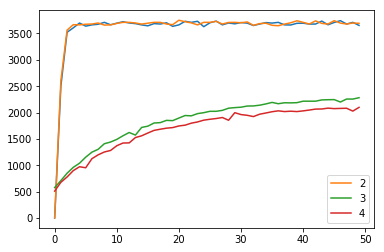

In [39]:
roro1 = np.loadtxt('roro1.txt')
roro2 = np.loadtxt('roro2.txt')
roro3 = np.loadtxt('roro3.txt')
roro4 = np.loadtxt('roro4.txt')

flag1 = np.where(roro1==10000) #tuple
flag2 = np.where(roro2==10000)
flag3 = np.where(roro3==10000)
flag4 = np.where(roro4==10000)

index1 = 87
index2 = index1 + 1

y1 = list(roro1[ flag1[0][index1]+1:flag1[0][index1+1]])
plt.plot(y1);


plt.plot(roro2[flag2[0][index1]+1:flag2[0][index1+1]], label='2') 
plt.plot(roro3[flag3[0][index1]+1:flag3[0][index1+1]], label='3')
plt.plot(roro4[flag4[0][index2]+1:flag4[0][index2+1]], label='4')

plt.legend() ; plt.show()


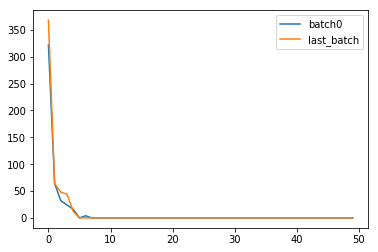

(195, 50)


In [40]:
data_batched = []

for i,f in enumerate(flag1[0][:-1]):
    batch = np.array(roro1[f+1:flag1[0][i+1]])
    #print(batch.shape)
    if batch.shape[0]==50:
       # print(i)
        #print(batch.shape[0])
        data_batched.append(batch)
data_batched = np.array(data_batched)
#print(data_batched)
plt.plot(data_batched[0], label='batch0')
plt.plot(data_batched[-1], label='last_batch')
plt.legend()
plt.show()
print(data_batched.shape)

In [ ]:
# Attention ! Ligne suivante à modifier au cas par cas : 
# si la 1er batch est une décharge : on l'enlève (1er indice : 1)
# sinon : 1er indice : pas besoin de préciser
# si le dernier batch est une charge : on l'enlève (dernier indice : -1)
# sinon : dernier indice : pas besoin de préciser 

(97, 100)


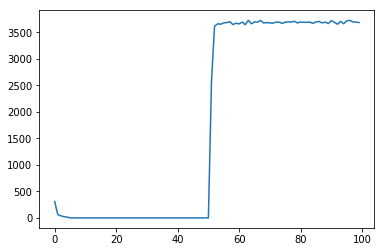

In [41]:
data_batched = np.reshape(data_batched[:-1,:], (-1,100))
pickle.dump(data_batched, open('droite.pkl', 'wb'))
data = np.reshape(pickle.load(open('droite.pkl', 'rb')), (-1, 100))
print(data.shape)
targets=np.array(['droite']*data.shape[0])
plt.plot(data[14])
plt.show()
pickle.dump(data, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/droite/input.pkl', 'wb')) 
pickle.dump(targets, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/droite/targets.pkl', 'wb'))

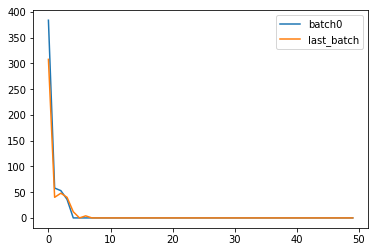

(195, 50)


In [42]:
data_batched = []

for i,f in enumerate(flag2[0][:-1]):
    batch = np.array(roro2[f+1:flag2[0][i+1]])
    #print(batch.shape)
    if batch.shape[0]==50:
       # print(i)
        #print(batch.shape[0])
        data_batched.append(batch)
data_batched = np.array(data_batched)
#print(data_batched)
plt.plot(data_batched[0], label='batch0')
plt.plot(data_batched[-1], label='last_batch')
plt.legend()
plt.show()
print(data_batched.shape)

(97, 100)


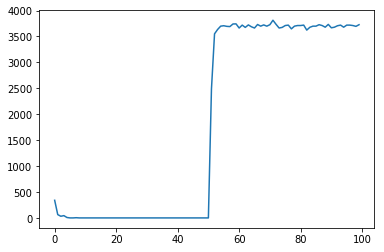

In [43]:
data_batched = np.reshape(data_batched[:-1,:], (-1,100))
pickle.dump(data_batched, open('gauche.pkl', 'wb'))
data = np.reshape(pickle.load(open('gauche.pkl', 'rb')), (-1, 100))
print(data.shape)
targets=np.array(['gauche']*data.shape[0])
plt.plot(data[13])
plt.show()
pickle.dump(data, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/gauche/input.pkl', 'wb')) 
pickle.dump(targets, open('C:/Users/tuoab/Documents/GitHub/conduction_galvanique/data/gauche/targets.pkl', 'wb'))

# la valeur 170 est pour séparer les données test des données d'entrainement

In [22]:
data

array([[ 384.,   58.,   53., ..., 3727., 3639., 3711.],
       [ 352.,   42.,   48., ..., 3703., 3679., 3675.],
       [ 346.,   32.,   48., ..., 3679., 3687., 3678.],
       ...,
       [ 336.,  115.,   14., ..., 3525., 3687., 3703.],
       [ 320.,   54.,   56., ..., 3719., 3727., 3663.],
       [ 346.,   56.,   18., ..., 3679., 3707., 3695.]])